## Introduction

Here we have a data of patients who suffering from heart disease

## About the  given data

Age- the age of patient

Sex-Male=0,Female=1

BP- BP of the patient

Cholestrol- The Cholestrol of the patient

Heart Disease- 0=Patient is not having Heart Disease and 1= Patient is having Heart Disease

The targets of the analysis are:

. To analyize the dataset content using EDA and to understand if it's possible build one model allowing to predict heart
disease in the patients or not.

. To train a model allowing to predict heart disease in a patient with the highest accuracy,F1 score and ROC-AUC metric.

. To evaluate feature importance of a model and to analyze the most impactful factors. The dataset was taken from
Kaggle repository. Heart Disease




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/heart_disease.csv")
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.shape

(270, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [7]:
df.describe(percentiles=[.25,.50,.75,.90,.99])

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
90%,66.000000,1.000000,152.000000,309.000000,1.000000
99%,71.930000,1.000000,180.000000,407.620000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [8]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Length: 270, dtype: bool

In [10]:
df.duplicated().sum().sum()

0

In [11]:
a=df['heart disease']

In [12]:
df=df.drop('heart disease',axis=1)

In [13]:
df.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [14]:
df.isnull().sum().sum()

0

In [15]:
df.age.value_counts()

54    16
58    15
51    12
57    12
59    12
60    12
52    11
62    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
53     7
63     7
61     7
46     7
45     7
48     7
43     7
50     7
55     6
66     6
49     5
70     4
47     4
40     3
71     3
39     3
35     3
69     3
68     3
37     2
34     2
76     1
74     1
38     1
77     1
29     1
Name: age, dtype: int64

In [16]:
df.sex.value_counts()

1    183
0     87
Name: sex, dtype: int64

In [17]:
a.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [18]:
df.isnull().sum()

age           0
sex           0
BP            0
cholestrol    0
dtype: int64

In [19]:
df.duplicated().sum()

0

## Visualising the Data for better understanding


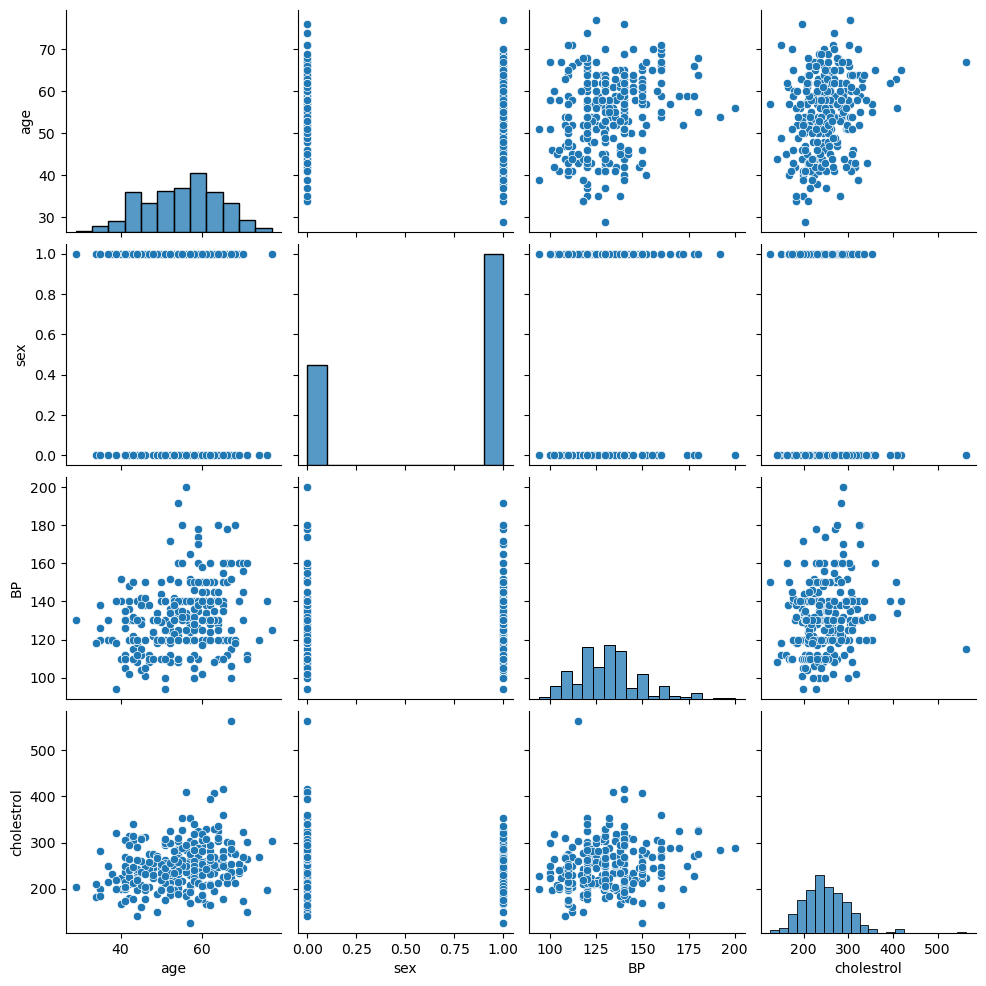

In [20]:
sns.pairplot(df[['age','sex','BP','cholestrol']])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart disease', ylabel='count'>

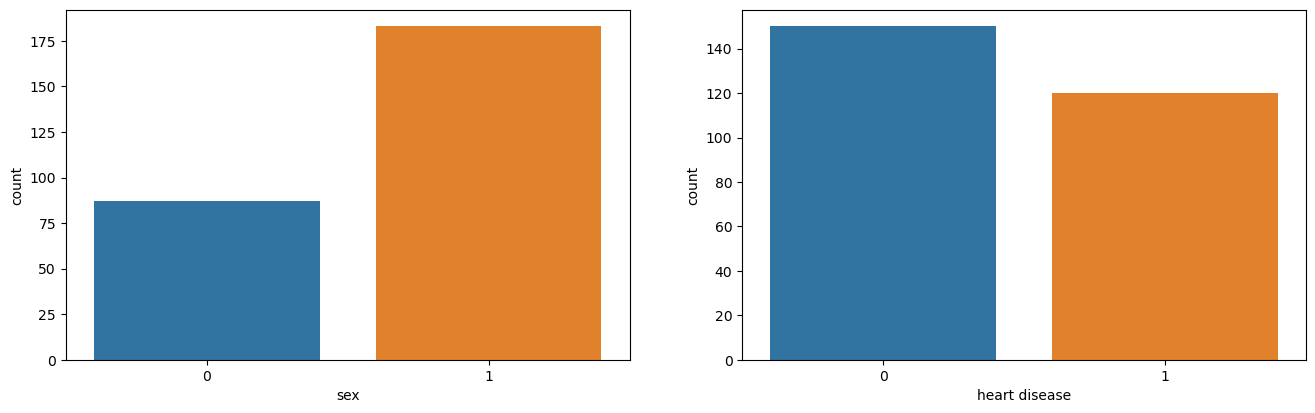

In [21]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(df['sex'])
plt.subplot(2,2,2)
sns.countplot(a)

Conclusion:

. The dataset have more females as compare to male.

. The dataset have less patients who have heart disease as compared to patients who have not  heart disease.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='cholestrol', ylabel='Density'>

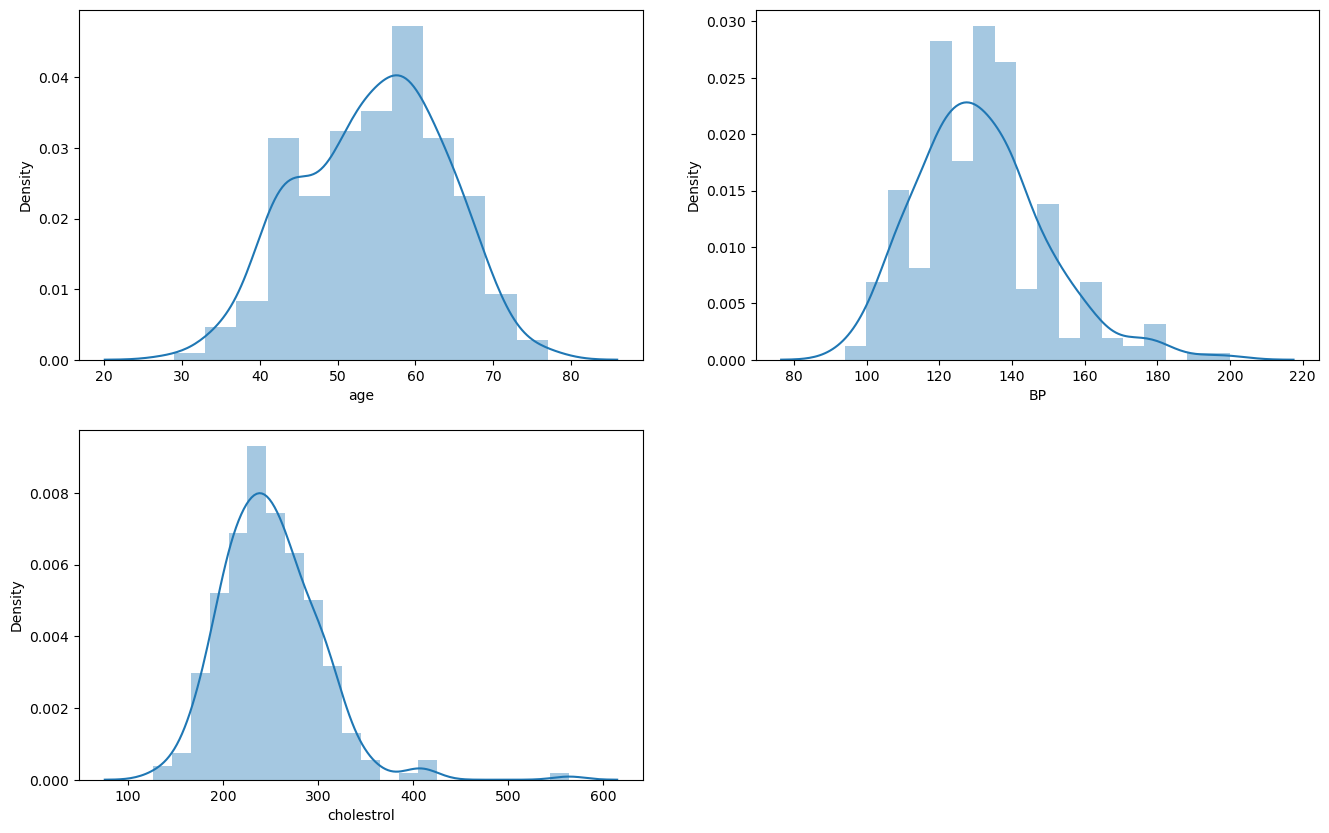

In [22]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['age'])
plt.subplot(2,2,2)
sns.distplot(df['BP'])
plt.subplot(2,2,3)
sns.distplot(df['cholestrol'])

Conclusion:

. Maximum patients belong to age of 50 to 70years.

.BP of patients maximum ranges between 120 to 140.

. Cholestrol of patients maximum ranges between 200 to 300


BP of patients according to their ages

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


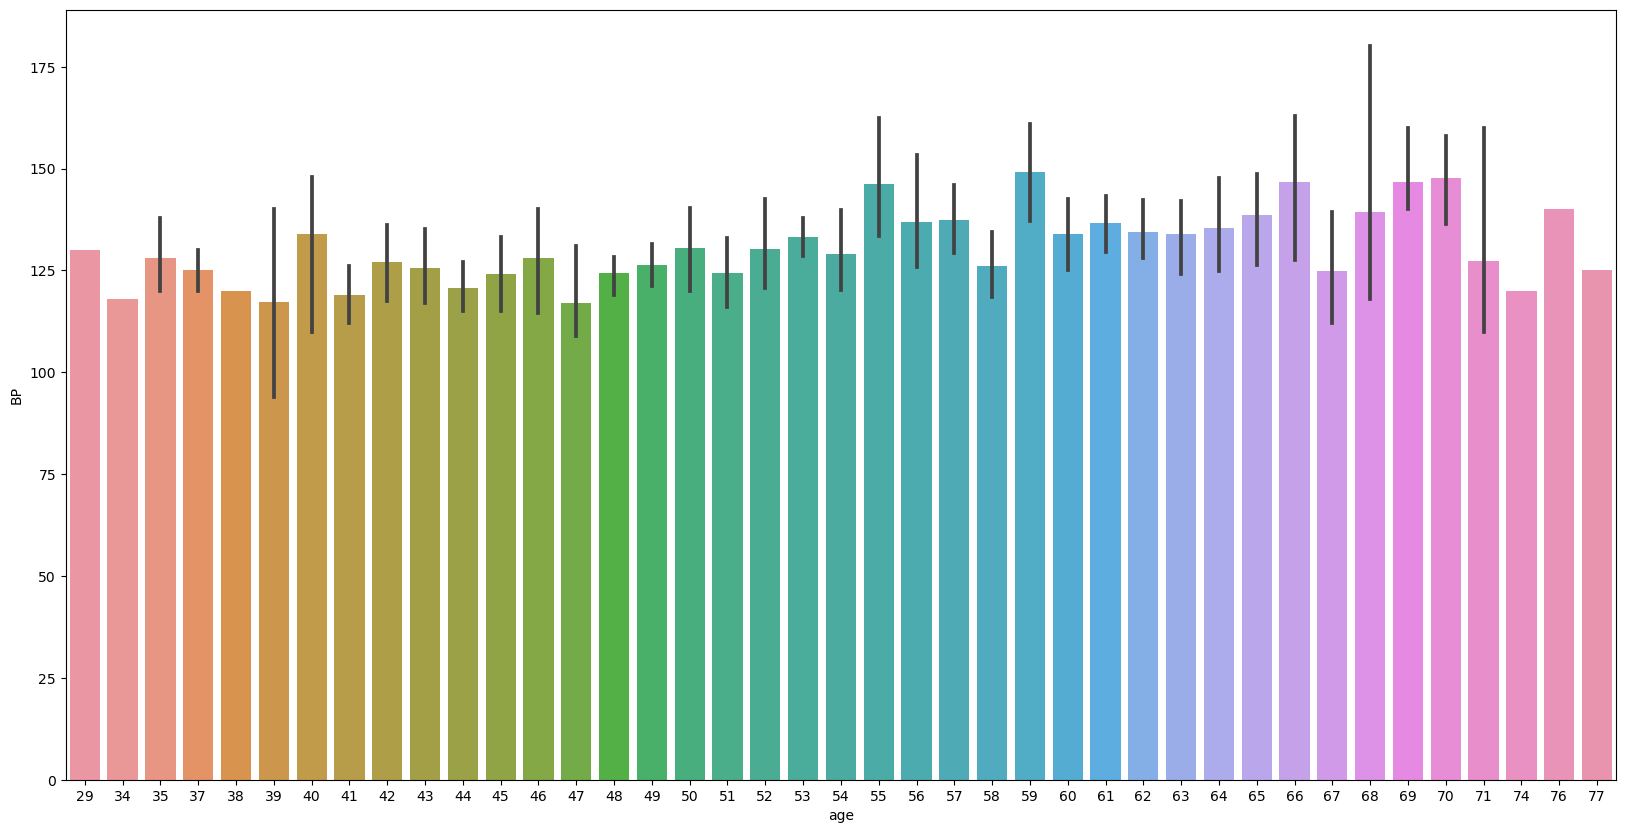

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(df['age'],df['BP'])
plt.show()

### Conclusion

. The patients of age 40,55,59,66,69 and 70 have high BP as compared to others

Cholestrol of patients according to their age

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


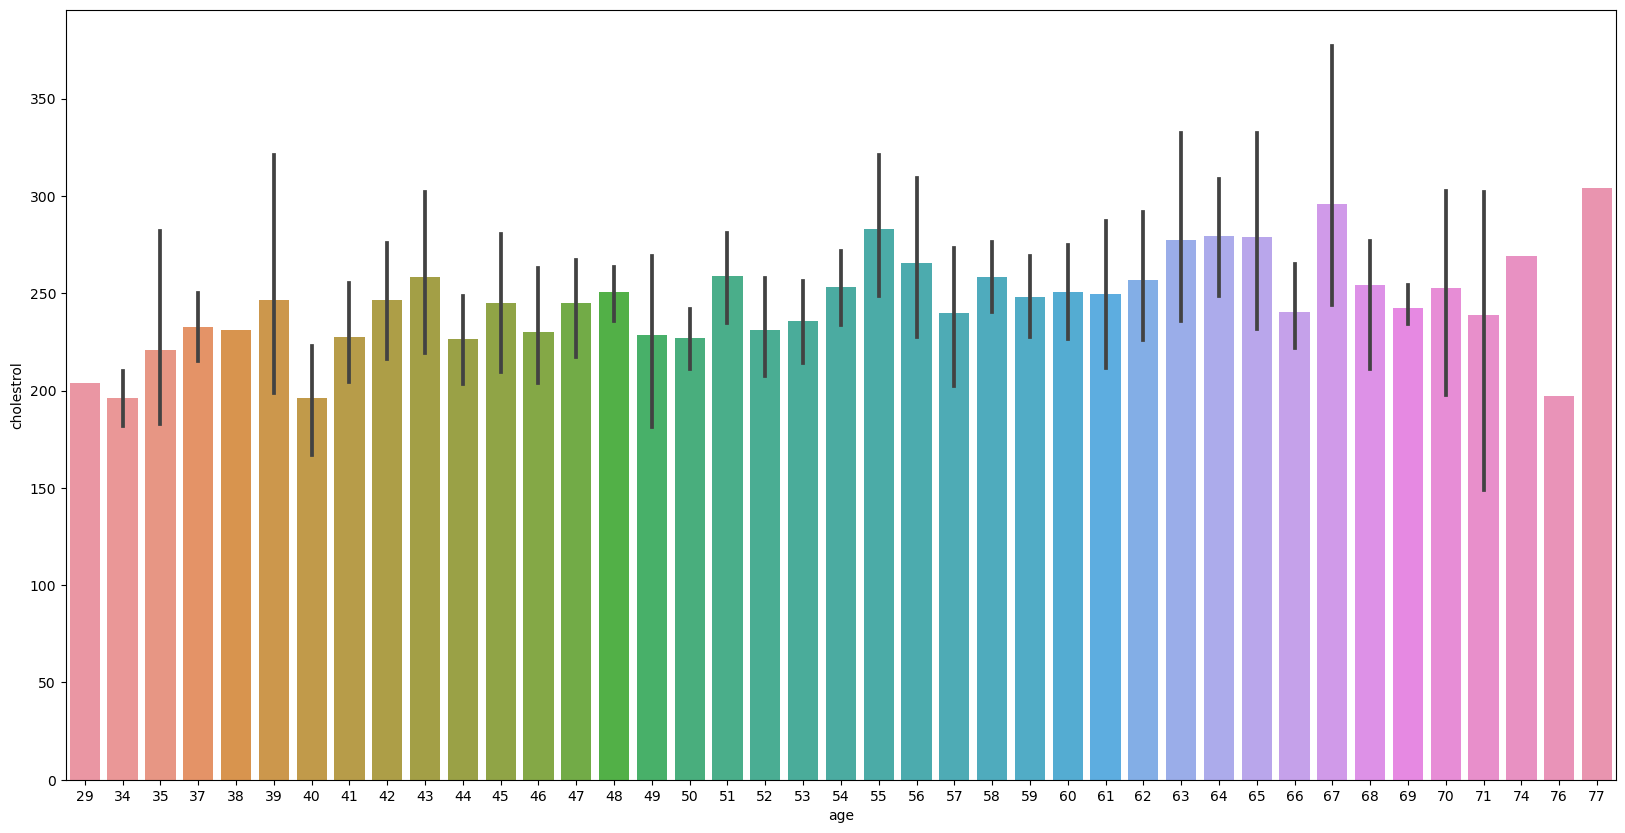

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(df['age'],df['cholestrol'])
plt.show()

Conclusion:

. The patients of age between 55 and 67 have high colestrol as compared to others

BP of patients according to their sex

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


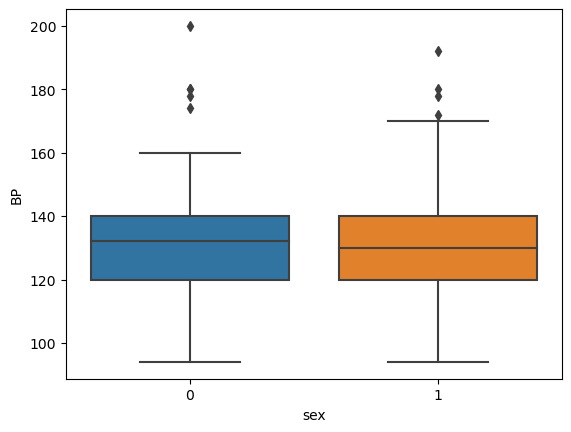

In [25]:
sns.boxplot(df['sex'],df['BP'])
plt.show()


    Conclusion:
    
    .The male patients have BP as compared to female

Cholestrol of patients according to their sex

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


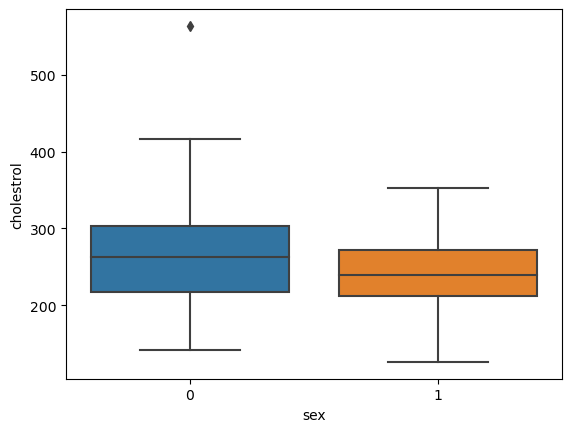

In [26]:
sns.boxplot(df['sex'],df['cholestrol'])
plt.show()

Conclusion:

.The male patients have high colestrol as compared to female

## Dealing with outliers

In [27]:
df.shape

(270, 4)

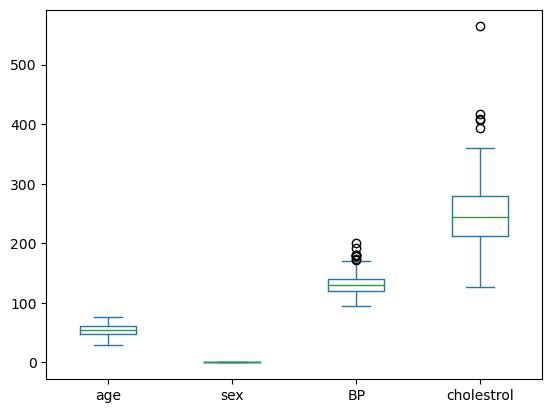

In [28]:
df.plot.box()
plt.show()

As we see we have outliers in only 2 columns 'BP' and 'cholestrol'. So, we remove the outliers


In [29]:
df = df.drop(index = df[(df['BP'] > 185)].index)
df = df.drop(index = df[(df['cholestrol'] > 500)].index)
df.shape


(267, 4)

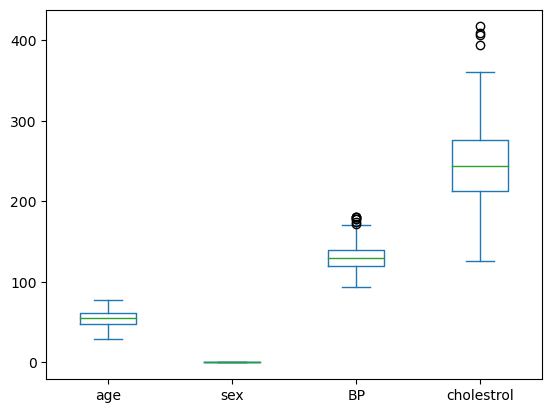

In [30]:
df.plot.box()
plt.show()

conclusion:

. Removing all the outliers from the dataset

## Scalling the features

In [32]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df[['age','BP','cholestrol']]= scaler.fit_transform(df[['age','BP','cholestrol']])

In [33]:
df.head()

,age,sex,BP,cholestrol
0,1.714372,1,-0.054214,1.535340
2,0.287373,1,-0.407269,0.266060
3,1.055757,1,-0.171899,0.307676
4,2.153448,0,-0.642639,0.432523
5,1.165526,1,-0.642639,-1.481801


## Model building

from sklearn.cluster import KMeans